# Quickly plot a meridional section of CROCO outputs

This notebook shows how xoa takes advantage of CF conventions.

* Read of the CROCO model outputs.
* Computation of the depths from s-coordinates with the [xoa.sigma](https://vacumm.github.io/xoa/api/xoa.sigma.html) module.
* Find the name of coordinates with the [xoa.cf](https://vacumm.github.io/xoa/api/xoa.cf.html) module,
* Make a simple plot.

## Inits
Import needed modules and register xarray accessors.

In [1]:
import xarray as xr
import cmocean
import xoa
xoa.register_accessors()

## Read the model
This sample is a meridional extraction of a full 3D CROCO output.

In [2]:
ds = xoa.open_data_sample("croco.south-africa.meridional.nc")
ds

<xarray.Dataset>
Dimensions:     (auxil: 4, eta_rho: 56, eta_v: 55, s_rho: 32, s_w: 33, time: 1, xi_rho: 1, xi_u: 1)
Coordinates:
  * eta_rho     (eta_rho) float32 6.0 7.0 8.0 9.0 10.0 ... 58.0 59.0 60.0 61.0
  * eta_v       (eta_v) float32 6.5 7.5 8.5 9.5 10.5 ... 57.5 58.5 59.5 60.5
    lat_rho     (eta_rho, xi_rho) float32 ...
    lat_u       (eta_rho, xi_u) float32 ...
    lat_v       (eta_v, xi_rho) float32 ...
    lon_rho     (eta_rho, xi_rho) float32 ...
    lon_u       (eta_rho, xi_u) float32 ...
    lon_v       (eta_v, xi_rho) float32 ...
  * s_rho       (s_rho) float32 -0.984375 -0.953125 ... -0.046875 -0.015625
  * s_w         (s_w) float32 -1.0 -0.96875 -0.9375 ... -0.0625 -0.03125 0.0
  * time        (time) float64 2.592e+06
  * xi_rho      (xi_rho) float32 131.0
  * xi_u        (xi_u) float32 131.5
Dimensions without coordinates: auxil
Data variables:
    AKt         (time, s_w, eta_rho, xi_rho) float32 ...
    Cs_r        (s_rho) float32 ...
    Cs_w        (s_w) float32 ...
    Vtransform  float32 ...
    angle       (eta_rho, xi_rho) float32 ...
    el          float32 ...
    f           (eta_rho, xi_rho) float32 ...
    h           (eta_rho, xi_rho) float32 ...
    hbl         (time, eta_rho, xi_rho) float32 ...
    hc          float32 ...
    mask_rho    (eta_rho, xi_rho) float32 ...
    pm          (eta_rho, xi_rho) float32 ...
    pn          (eta_rho, xi_rho) float32 ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 ...
    sc_r        (s_rho) float32 ...
    sc_w        (s_w) float32 ...
    temp        (time, s_rho, eta_rho, xi_rho) float32 ...
    time_step   (time, auxil) int32 ...
    u           (time, s_rho, eta_rho, xi_u) float32 ...
    v           (time, s_rho, eta_v, xi_rho) float32 ...
    w           (time, s_rho, eta_rho, xi_rho) float32 ...
    xl          float32 ...
    zeta        (time, eta_rho, xi_rho) float32 ...
Attributes:
    type:           ROMS history file
    title:          BENGUELA TEST MODEL
    date:           
    rst_file:       CROCO_FILES/croco_rst.nc
    his_file:       CROCO_FILES/croco_his.nc
    avg_file:       CROCO_FILES/croco_avg.nc
    grd_file:       CROCO_FILES/croco_grd.nc
    ini_file:       CROCO_FILES/croco_ini.nc
    frc_file:       
    qbar_file:      CROCO_FILES/croco_runoff.nc
    VertCoordType:  NEW
    skpp:           2005
    theta_s:        7.0
    theta_s_expl:   S-coordinate surface control parameter
    theta_b:        2.0
    theta_b_expl:   S-coordinate bottom control parameter
    Tcline:         200.0
    Tcline_expl:    S-coordinate surface/bottom layer width
    Tcline_units:   meter
    hc:             200.0
    hc_expl:        S-coordinate parameter, critical depth
    hc_units:       meter
    sc_w:           [-1.      -0.96875 -0.9375  -0.90625 -0.875   -0.84375 -0...
    sc_w_expl:      S-coordinate at W-points
    Cs_w:           [-1.00000000e+00 -9.24493670e-01 -8.38163316e-01 -7.46033...
    Cs_w_expl:      S-coordinate stretching curves at W-points
    sc_r:           [-0.984375 -0.953125 -0.921875 -0.890625 -0.859375 -0.828...
    sc_r_expl:      S-coordinate at W-points
    Cs_r:           [-9.6389008e-01 -8.8237631e-01 -7.9250270e-01 -6.9935721e...
    Cs_r_expl:      S-coordinate stretching curves at RHO-points
    ntimes:         8640
    ndtfast:        60
    dt:             1200.0
    dtfast:         20.0
    nwrt:           72
    ntsavg:         1
    ntsavg_expl:    starting time-step for accumulation of time-averaged fields
    navg:           72
    navg_expl:      number of time-steps between time-averaged records
    tnu4:           0.0
    tnu4_expl:      biharmonic mixing coefficient for tracers
    units:          meter4 second-1
    rdrg:           0.0003
    rdrg_expl:      linear drag coefficient
    rdrg_units:     meter second-1
    rho0:           1025.0
    rho0_expl:      Mean density used in Boussinesq approximation
    rho0_units:     kilogram meter-3
    gamma2:         1.0
    gamma2_expl: 

## Compute depths from s-coordinates
Decode the dataset according to the CF cnvensions:

1. Find sigma terms
2. Compute depths
3. Assigna depths as coordinates

In [3]:
ds = ds.decode_sigma()
ds.depth

<xarray.DataArray 'depth' (time: 1, s_rho: 32, eta_rho: 56, xi_rho: 1)>
array([[[[-4.4787710e+03],
         [-4.4534194e+03],
         [-4.4333271e+03],
         ...,
         [-7.3894226e+01],
         [-7.3414513e+01],
         [-7.3409134e+01]],

        [[-4.1099888e+03],
         [-4.0867766e+03],
         [-4.0683792e+03],
         ...,
         [-7.0494987e+01],
         [-7.0042336e+01],
         [-7.0037262e+01]],

        [[-3.7039980e+03],
         [-3.6831455e+03],
         [-3.6666174e+03],
         ...,
         [-6.6922798e+01],
         [-6.6499138e+01],
         [-6.6494392e+01]],

        ...,

        [[-1.7932339e+01],
         [-1.7888559e+01],
         [-1.7848497e+01],
         ...,
         [-4.2952929e+00],
         [-4.2748423e+00],
         [-4.2746129e+00]],

        [[-1.0079492e+01],
         [-1.0048058e+01],
         [-1.0017785e+01],
         ...,
         [-2.5738845e+00],
         [-2.5616508e+00],
         [-2.5615137e+00]],

        [[-3.1787627e+00],
         [-3.1540668e+00],
         [-3.1291361e+00],
         ...,
         [-8.5690212e-01],
         [-8.5283607e-01],
         [-8.5279047e-01]]]], dtype=float32)
Coordinates:
  * eta_rho  (eta_rho) float32 6.0 7.0 8.0 9.0 10.0 ... 57.0 58.0 59.0 60.0 61.0
    lat_rho  (eta_rho, xi_rho) float32 -37.671074 -37.605114 ... -33.95727
    lon_rho  (eta_rho, xi_rho) float32 18.833334 18.833334 ... 18.833334
  * s_rho    (s_rho) float32 -0.984375 -0.953125 ... -0.046875 -0.015625
  * time     (time) float64 2.592e+06
  * xi_rho   (xi_rho) float32 131.0
    depth    (time, s_rho, eta_rho, xi_rho) float32 -4478.771 ... -0.8527905
Attributes:
    units:          m
    long_name:      Depth
    standard_name:  ocean_layer_depth

## Find coordinate names from CF conventions
The `depth` were assigned as coordinates at the previous stage.
We use the `cf` data array accessor to easlily access the latitude coordinate array.

In [4]:
temp = ds.temp.squeeze()
lat_name = temp.cf.lat.name
depth_name = temp.cf.depth.name

/local/home/sraynaud/Src/xoa/xoa/cf.py:1541: XoaWarning: Multiple items found while you requested a single one
  xoa_warn("Multiple items found while you requested a single one")


### Plot temperature
Make a basic contour plot.

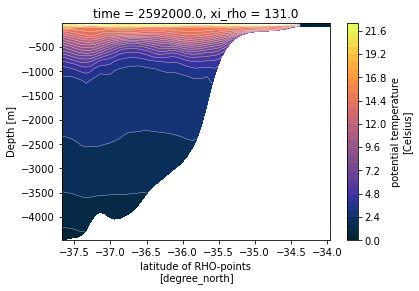

In [5]:
temp.plot.contourf(lat_name, depth_name, cmap="cmo.thermal", levels=30)
temp.plot.contour(lat_name, depth_name, colors='w', levels=30, linewidths=.3);